In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm


In [9]:
df = pd.read_csv('../data/dataset.csv')

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

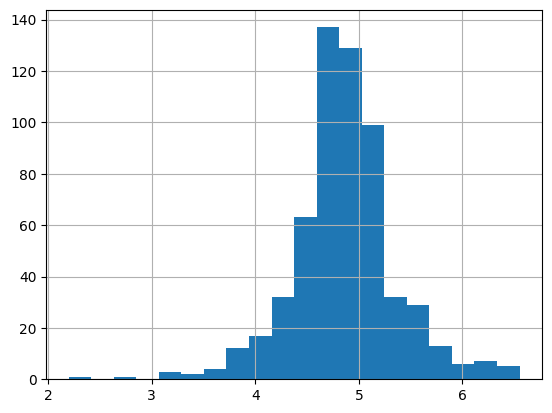

In [13]:
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

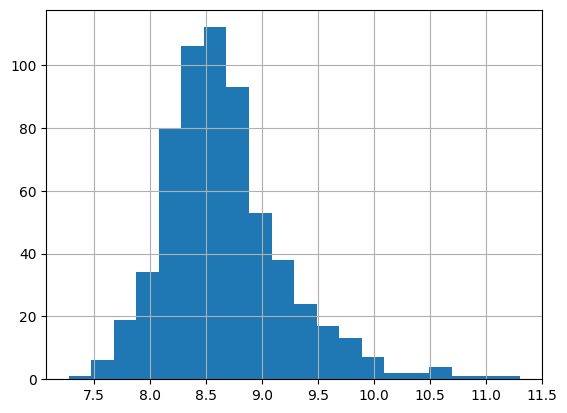

In [15]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipykernel_52888/1139414243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_52888/1139414243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [17]:
x = df.iloc[:,np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      shape=(614, 8), dtype=object)

In [18]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [19]:
print("Percentage of missing gender is %2f%%" %((df['Gender'].isnull().sum() / df.shape[0]) * 100))

Percentage of missing gender is 0.000000%


Percentage of people who take loan as group by gender:
Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

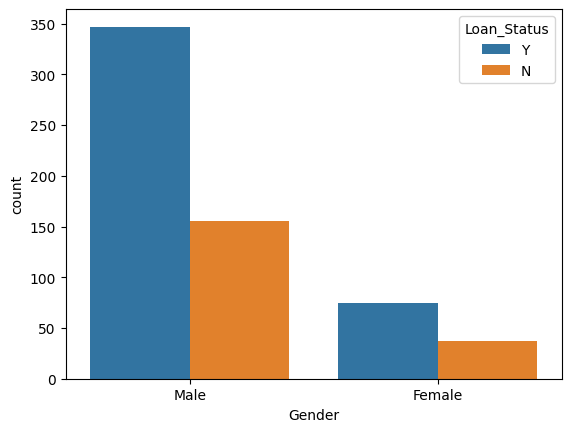

In [20]:
print("Percentage of people who take loan as group by gender:")
print(df['Gender'].value_counts(normalize=True) * 100)
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, hue='Loan_Status')


Percentage of people who take loan as group by marital status:
Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

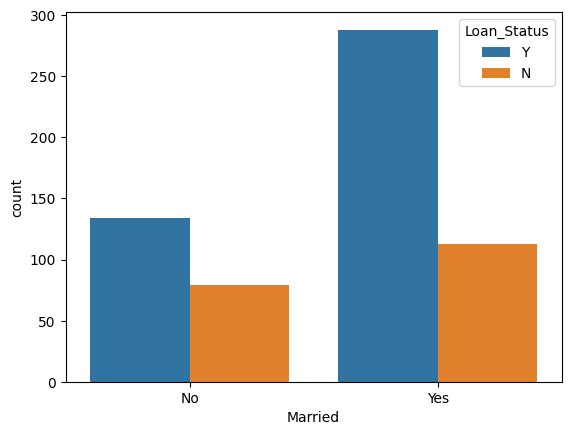

In [21]:
print("Percentage of people who take loan as group by marital status:")
print(df['Married'].value_counts(normalize=True) * 100)
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, hue='Loan_Status')

Percentage of people who take loan as group by dependents:
Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

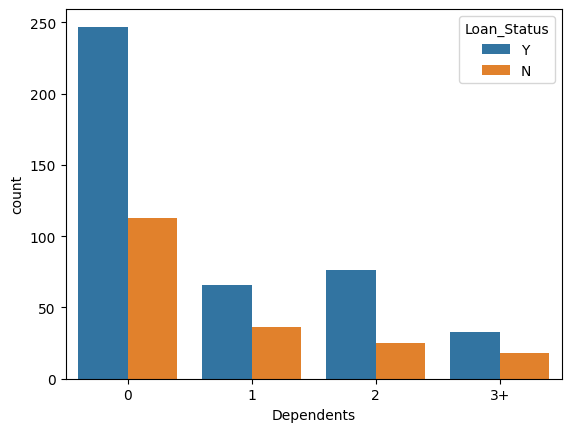

In [22]:
print("Percentage of people who take loan as group by dependents:")
print(df['Dependents'].value_counts(normalize=True) * 100)
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, hue='Loan_Status')

Percentage of people who take loan as group by self employed:
Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

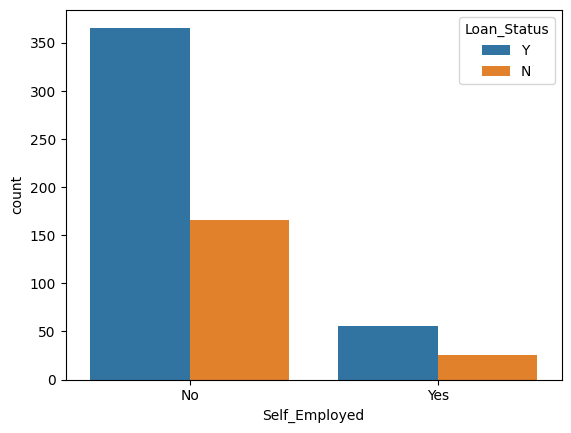

In [23]:
print("Percentage of people who take loan as group by self employed:")
print(df['Self_Employed'].value_counts(normalize=True) * 100)
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, hue='Loan_Status')

Percentage of people who take loan as group by Loan Amount:
LoanAmount
146.412162    3.583062
120.000000    3.257329
110.000000    2.768730
100.000000    2.442997
187.000000    1.954397
                ...   
292.000000    0.162866
142.000000    0.162866
350.000000    0.162866
496.000000    0.162866
253.000000    0.162866
Name: proportion, Length: 204, dtype: float64
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
187.000000    12
              ..
292.000000     1
142.000000     1
350.000000     1
496.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

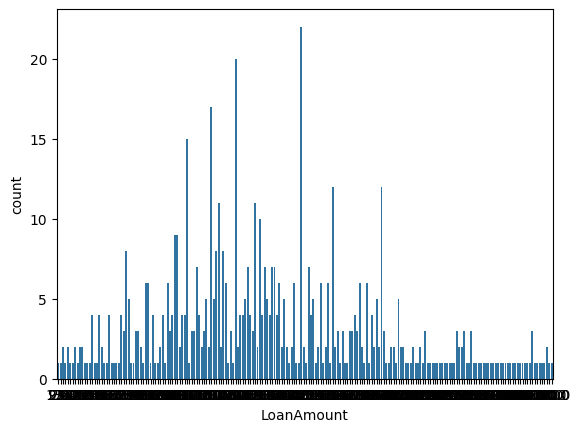

In [24]:
print("Percentage of people who take loan as group by Loan Amount:")
print(df['LoanAmount'].value_counts(normalize=True) * 100)
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df)

Percentage of people who take loan as group by Credit history:
Credit_History
1.0    85.504886
0.0    14.495114
Name: proportion, dtype: float64
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

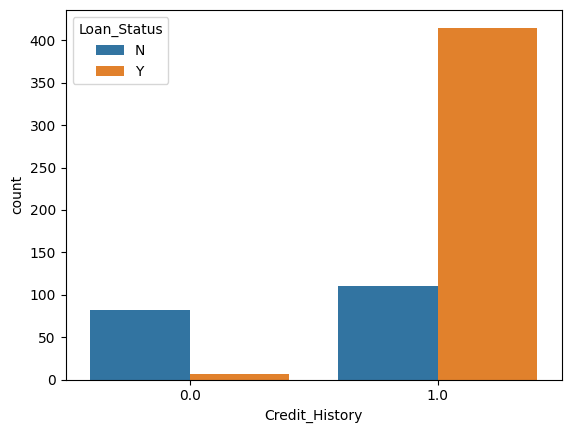

In [25]:
print("Percentage of people who take loan as group by Credit history:")
print(df['Credit_History'].value_counts(normalize=True) * 100)
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, hue='Loan_Status')

In [26]:
x = df.drop(['Loan_Status'], axis=1).values
y = df['Loan_Status'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

for i in range(0, 5):
    x_train[:, i] = Labelencoder_x.fit_transform(x_train[:, i])
x_train[:, 7] = Labelencoder_x.fit_transform(x_train[:, 7])
x_train

array([[62, 1, 1, ..., 5.579729825986222, 8250.0, 9.017968479328726],
       [68, 1, 1, ..., 4.875197323201151, 5858.0, 8.675563527387679],
       [176, 1, 1, ..., 5.3471075307174685, 7945.0, 8.980298078970817],
       ...,
       [210, 0, 0, ..., 3.4011973816621555, 3237.0, 8.082402253926244],
       [345, 0, 1, ..., 4.857444178729352, 10047.0, 9.215029361462314],
       [79, 1, 1, ..., 4.857444178729352, 13650.0, 9.521494800613105]],
      shape=(491, 15), dtype=object)

In [27]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [28]:
for i in range(0, 5):
    x_test[:, i] = Labelencoder_x.fit_transform(x_test[:, i])
x_test[:, 7] = Labelencoder_x.fit_transform(x_test[:, 7])
x_test

array([[75, 1, 1, ..., 5.429345628954441, 9083.0, 9.114159813502214],
       [80, 1, 1, ..., 4.867534450455582, 4310.0, 8.368693183097793],
       [37, 1, 1, ..., 5.062595033026967, 5614.0, 8.633018756921828],
       ...,
       [56, 1, 1, ..., 4.812184355372417, 4725.0, 8.460622839927844],
       [3, 1, 1, ..., 4.6913478822291435, 4340.0, 8.375629627094451],
       [73, 1, 1, ..., 6.194405391104672, 63337.0, 11.05622495553552]],
      shape=(123, 15), dtype=object)

In [29]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [30]:
#save data frames
# Convert to DataFrame before saving
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train, columns=['Loan_Status'])
y_test_df = pd.DataFrame(y_test, columns=['Loan_Status'])

# Save to data directory
X_train_df.to_csv('../data/X_train.csv', index=False)
X_test_df.to_csv('../data/X_test.csv', index=False)
y_train_df.to_csv('../data/y_train.csv', index=False)
y_test_df.to_csv('../data/y_test.csv', index=False)

In [31]:
# Solution: Fit encoders on combined data to see all possible values
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Store encoders for each column
encoders = {}

for i in range(x_train.shape[1]):
    if x_train[:, i].dtype == 'object':  # If column contains strings
        print(f"Encoding column {i}")
        
        # Combine train and test data for this column to see all possible values
        combined_column = np.concatenate([x_train[:, i], x_test[:, i]])
        
        # Fit encoder on combined data
        encoders[i] = LabelEncoder()
        encoders[i].fit(combined_column.astype(str))
        
        # Transform train and test separately
        x_train[:, i] = encoders[i].transform(x_train[:, i].astype(str))
        x_test[:, i] = encoders[i].transform(x_test[:, i].astype(str))

# Convert to numeric
x_train = x_train.astype(float)
x_test = x_test.astype(float)

# Check if conversion worked
print("After encoding:")
print("x_train dtype:", x_train.dtype)
print("x_test dtype:", x_test.dtype)
print("Sample x_train values:")
print(x_train[:3])

# Now StandardScaler should work
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

print("StandardScaler applied successfully!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Encoding column 0
Encoding column 1
Encoding column 2
Encoding column 3
Encoding column 4
Encoding column 5
Encoding column 6
Encoding column 7
Encoding column 8
Encoding column 9
Encoding column 10
Encoding column 11
Encoding column 12
Encoding column 13
Encoding column 14
After encoding:
x_train dtype: float64
x_test dtype: float64
Sample x_train values:
[[450.   1.   1.   0.   0.   0. 428.  23. 118.   6.   1.   1. 168. 517.
  448.]
 [456.   1.   1.   0.   0.   0. 174.  66.  31.   6.   1.   1.  85. 402.
  335.]
 [ 86.   1.   1.   2.   0.   0. 439. 196.  94.   6.   1.   1. 146. 510.
  442.]]
StandardScaler applied successfully!
X_train shape: (491, 15)
X_test shape: (123, 15)


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
y_pred

Accuracy: 0.7642276422764228


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [35]:
y_pred_nb = nb_clf.predict(X_test)
print("Naive Bayes Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))
y_pred_nb

Naive Bayes Accuracy: 0.7886178861788617


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
y_pred = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
y_pred

Decision Tree Accuracy: 0.6341463414634146


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
y_pred = knn_clf.predict(X_test)
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred))
y_pred

KNN Accuracy: 0.7723577235772358


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
print("Unique y_test labels:", set(y_test))
print("Unique y_pred_nb labels:", set(y_pred_nb))


Unique y_test labels: {np.int64(0), np.int64(1)}
Unique y_pred_nb labels: {np.int64(0), np.int64(1)}


Classification Report:
              precision    recall  f1-score   support

    Rejected       0.95      0.42      0.58        43
    Approved       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



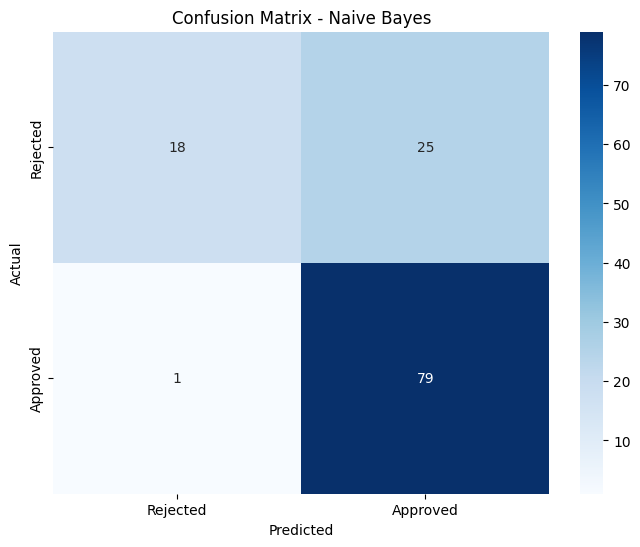

Precision (Approved): 0.7596
Recall (Approved): 0.9875
F1-Score (Approved): 0.8587


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Rejected', 'Approved']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Precision, Recall, F1-Score (for class 1 -> Approved)
print(f"Precision (Approved): {precision_score(y_test, y_pred_nb, pos_label=1):.4f}")
print(f"Recall (Approved): {recall_score(y_test, y_pred_nb, pos_label=1):.4f}")
print(f"F1-Score (Approved): {f1_score(y_test, y_pred_nb, pos_label=1):.4f}")